In [0]:
!pip3 install torch torchvision

In [0]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #cuda tensor type using gpu for computation

In [0]:
!git clone https://github.com/jaddoescad/ants_and_bees.git 

Cloning into 'ants_and_bees'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 45.03 MiB | 46.34 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [0]:
!ls

ants_and_bees  sample_data


In [0]:
!ls ants_and_bees

train  val


In [0]:
!ls ants_and_bees/train

ants  bees


In [0]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [0]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                  #rotation hinder perfroamnce
                                      transforms.RandomAffine(0,shear=10, scale=(0.8,1.2)), #Next we have the shear transformation which one can denote as shear is equal to in plain geometry ashear mapping is a linear map that displaces each point in a fixed direction by an amount proportional to its sine distance from a line that is parallel to that direction.
                                      transforms.ColorJitter(brightness=1, contrast=0.2, saturation=0.2),
                                      #jitter value close to 1 better
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,),(0.5,))
                                     ]) 

transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))]) 
#Compose - chain together transofrmaton, convert numpy array from 0 to 255, into float tensor from 0 to 1
#encoded in tensor shape which characterizes image channel height and weight
#mean value and standard deviation - creates range from -1 to 1
#normalization reduce skewness and disttion within our data ensuring effective learning process

training_dataset = datasets.ImageFolder(root ='ants_and_bees/train', transform=transform_train)
#Image folder prelabel the firt class as 0 and bees as 1
validation_dataset = datasets.ImageFolder(root ='ants_and_bees/val', transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=20, shuffle=False)

#suffle ensuring the training data cahgnes every iteration so it grad doesnt get stuck in local minimum

In [0]:
print(len(training_dataset))
print(len(validation_dataset))

244
153


In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy() #detach to call numpy single color channel with height 28*28 pixels
  image = image.transpose(1,2,0) #swap axis 0 to axis 1, axis 1 to axis 2, and 0 in the end
  image = image*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1) 
  return image

In [0]:
!pip intall Pillow==4.0.0

ERROR: unknown command "intall" - maybe you meant "install"


In [0]:
classes = ['ant', 'bee']

Training loader is what we do to specify training batches. 

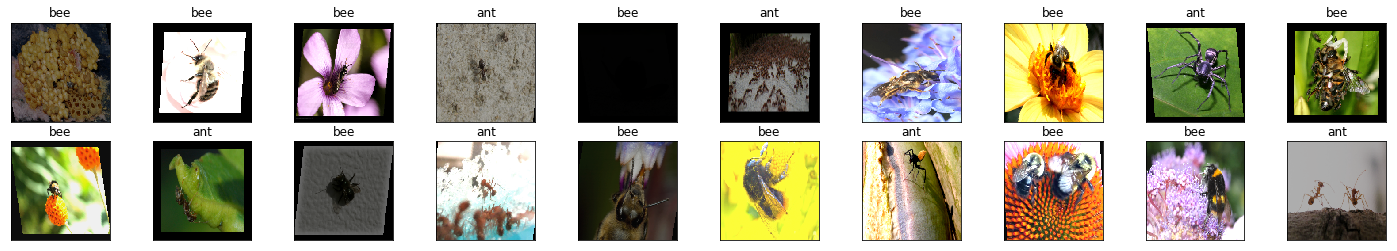

In [0]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [0]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 127680177.99it/s]


In [0]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Now there are still issues to address before training the model and our own datasets recall from the theory portion we must freeze the parameters inside the feature extraction part of our network such that the convolution of layers will be unaffected by training.

We are going to then use the feature extraction knowledge they have developed without tampering with it. We will keep the fully connected layers dynamic as we want them to learn which features are important to classify for our specific dataset.

So the parameters in the fully connected layer will change and adapt to our small data sets enough freezing the parameters inside the feature extraction portion of our network is done by first creating

a new cell and we will write the following for param in model dot features the parameters.

In [0]:
for params in model.features.parameters():
  params.requires_grad = False #freeze model and we know not gonna use gradient
  

In [0]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

It requires grad is equal to False which will essentially freeze those layers such that it leaves these

parameters unaffected by the back propagation process that normally updates these weights.

They will not require the gradients as mentioned by documentation.

Setting requires grad equal to False.

This is a very useful technique when you want to freeze the part of your model and you know in advance

that you're not going to use gradients with respect to these parameters.

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
#lower learning rate can help complex dataset
#training process is slow a training accuracy doesnt improve through epochs

In [0]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for i in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs,labels in training_loader:
    inputs = inputs.to(device) #every input goes in device
    labels = labels.to(device)
    
    #no need to flatten image
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _,pred = torch.max(outputs,1)
    running_corrects += torch.sum(pred == labels.data)
    running_loss += loss.item()
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)
        
        _,val_pred = torch.max(val_outputs,1)
        val_running_corrects += torch.sum(val_pred == val_labels.data)
        val_running_loss += val_loss.item()
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset) #give probability from 0 to as divide correct by total images
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch:', (i+1))
    print('Training Loss:{:.4f}, {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('Validation Loss:{:.4f}, validation acc {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))
    

epoch: 1
Training Loss:0.0257, 0.7459
Validation Loss:0.0125, validation acc 0.9020
epoch: 2
Training Loss:0.0110, 0.9303
Validation Loss:0.0134, validation acc 0.9020
epoch: 3
Training Loss:0.0079, 0.9426
Validation Loss:0.0135, validation acc 0.9281
epoch: 4
Training Loss:0.0072, 0.9344
Validation Loss:0.0134, validation acc 0.9150
epoch: 5
Training Loss:0.0053, 0.9713
Validation Loss:0.0130, validation acc 0.9412
epoch: 6
Training Loss:0.0074, 0.9508
Validation Loss:0.0216, validation acc 0.9020
epoch: 7
Training Loss:0.0069, 0.9344
Validation Loss:0.0147, validation acc 0.9346
epoch: 8
Training Loss:0.0051, 0.9549
Validation Loss:0.0175, validation acc 0.9085
epoch: 9
Training Loss:0.0067, 0.9385
Validation Loss:0.0176, validation acc 0.9150
epoch: 10
Training Loss:0.0037, 0.9549
Validation Loss:0.0274, validation acc 0.9085


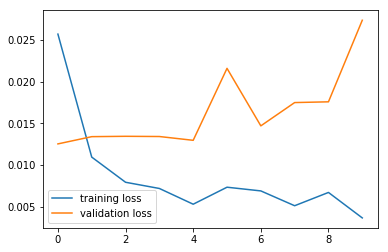

In [0]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

Loss fluctuates as epoch progress
Too loss of learning rate cause dracistic updates which flip flops

If learning rate slow or loss function gets stuck at minimum. Higher learning rate inherit divergent behaviors that will alors parameters to escape the local minima

Use of low lr of a loss that stop decreasing at high value



---



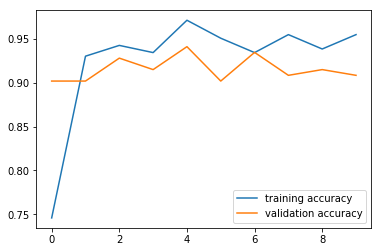

In [0]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

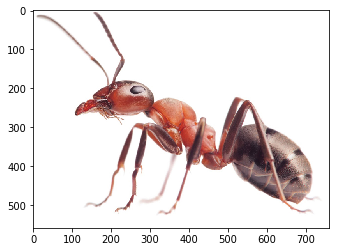

In [0]:
import requests
import PIL.ImageOps
from PIL import Image
url = "https://romneypestcontrol.com/img/library/ant.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


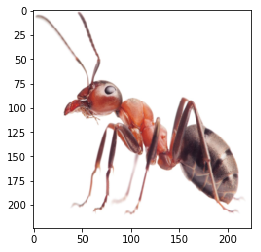

In [0]:
img = transform(img)
plt.imshow(im_convert(img))

In [0]:
image = img.to(device).unsqueeze(0)
output = model(image)
_,pred = torch.max(output,1)
print(classes[pred.item()])

ant


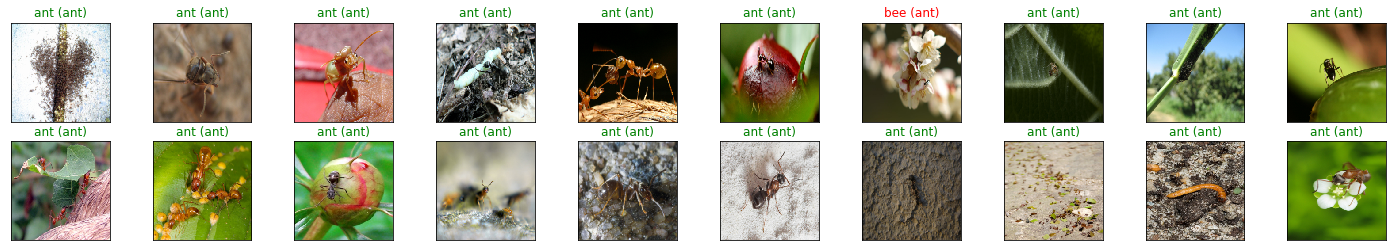

In [0]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)
 
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx])) #cant convert tensor cudo to np
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])),color =("green" if preds[idx] == labels[idx] else "red"))